In [15]:
#import libraries
import tweepy
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

In [16]:
#Twitter API credentials
api_key = 'XXXXXXXXXXXXXXXXXXXXXXXX'api_key_secret = 'XXXXXXXXXXXXXXXXXXXXXXXX'access_token = 'XXXXXXXXXXXXXXXXXXXXXXXX'access_token_secret = 'XXXXXXXXXXXXXXXXXXXXXXXX'

In [17]:
#create the authentication object
auth = tweepy.OAuthHandler(api_key, api_key_secret)

#set the accesstoken and accesstokensecret
auth.set_access_token(access_token, access_token_secret)

#create the API object while passing in the auth information
api = tweepy.API(auth)

In [18]:
keywords = '2002'
limit = 300

tweets = tweepy.Cursor(api.search_tweets, q=keywords, count = 100, lang = 'en', tweet_mode= 'extended').items(limit)

In [19]:
#columns = ['name', 'tweet']
data = []

for tweet in tweets:
    data.append([tweet.user.screen_name, tweet.full_text])
    #data.append({ 'name': tweet.user.screen_name,  'tweet': tweet.full_text})
    
#print(tweet)
df = pd.DataFrame(data, columns = ['name', 'tweet'])
print(df)

                name                                              tweet
0     maksymeristavi  RT @uaexplainers: In 2002, I went to the cinem...
1        gaabaanii8_  @Cape_2002 People know the sound of whales and...
2    GTSDistribution  RT @BCW_SportsCards: After the World Cup group...
3        Imaadarshhv  RT @vedangkali: People born in 2000, 2001, 200...
4      AnimatorRyuki  RT @hardfgpics: Guilty Gear X: The Butterfly a...
..               ...                                                ...
295      sondravet22  RT @surflant: In 2002, astronaut and Chickasaw...
296      ShahidFcb17  @JanaSimp123 @Warcelona_ Does this genocide ma...
297    DEEPAK_S_2002                      @MuhammadSmiry What a shot 😅😂
298     namminjoongi  RT @prodK0YA: AHDJDH “RM collaborated with the...
299    Jboul_Joestar  RT @hardfgpics: Guilty Gear X: The Butterfly a...

[300 rows x 2 columns]


In [20]:
#create a function to clean the tweets, ie; get rid of @, RT, numbers, url and so on
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #to remove @ mentions, + = 1 or more
    text = re.sub(r'#', '', text) #to remove # symbols
    text = re.sub(r'RT[\s]+', '', text) #to remove @ mentions. [\s] = one or more white spaces
    text = re.sub(r'https?:\/\/\+S', '', text) #remove hyperlinks. s? = may or may not an s. +S = may have whitespaces 
    
    return text

#apply function to the 'tweet' columns of the dataframe
df['tweet'] = df['tweet'].apply(cleanTxt)

#show the cleaned text
df

,name,tweet
0,maksymeristavi,": In 2002, I went to the cinema to see Star Wa..."
1,gaabaanii8_,_2002 People know the sound of whales and dolp...
2,GTSDistribution,"_SportsCards: After the World Cup group stage,..."
3,Imaadarshhv,": People born in 2000, 2001, 2002, 2003, 2004 ..."
4,AnimatorRyuki,: Guilty Gear X: The Butterfly and Her Gale (2...
...,...,...
295,sondravet22,": In 2002, astronaut and Chickasaw Indian John..."
296,ShahidFcb17,_ Does this genocide makes gujrat 2002 okay?\...
297,DEEPAK_S_2002,What a shot 😅😂
298,namminjoongi,: AHDJDH “RM collaborated with the band Cherry...


In [21]:
#create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Create two new columns
df['Subjectivity'] = df['tweet'].apply(getSubjectivity)
df['Polarity'] = df['tweet'].apply(getPolarity)

#Show the new dataframe with the new columns
df

,name,tweet,Subjectivity,Polarity
0,maksymeristavi,": In 2002, I went to the cinema to see Star Wa...",0.500000,0.0000
1,gaabaanii8_,_2002 People know the sound of whales and dolp...,0.532222,0.0775
2,GTSDistribution,"_SportsCards: After the World Cup group stage,...",0.250000,0.2500
3,Imaadarshhv,": People born in 2000, 2001, 2002, 2003, 2004 ...",0.500000,0.5000
4,AnimatorRyuki,: Guilty Gear X: The Butterfly and Her Gale (2...,1.000000,-0.5000
...,...,...,...,...
295,sondravet22,": In 2002, astronaut and Chickasaw Indian John...",0.166667,0.1250
296,ShahidFcb17,_ Does this genocide makes gujrat 2002 okay?\...,0.500000,0.5000
297,DEEPAK_S_2002,What a shot 😅😂,0.000000,0.0000
298,namminjoongi,: AHDJDH “RM collaborated with the band Cherry...,0.000000,0.0000


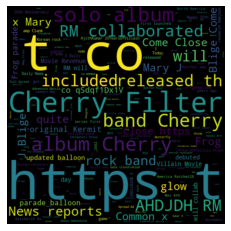

In [22]:
#plot the word cloud
allwords = ' '.join([twts for twts in df['tweet']])
wordCloud = WordCloud(width=500, height=500, random_state = 21, max_font_size = 119).generate(allwords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off') #to remove the axis
plt.show()

In [23]:
#Create a function to compute the polarity(negative, neutral, positive) sentiments
def getSentiments(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
#create a new column to save the sentiments
df['Sentiments'] = df['Polarity'].apply(getSentiments)

#Show the dataframe
df

,name,tweet,Subjectivity,Polarity,Sentiments
0,maksymeristavi,": In 2002, I went to the cinema to see Star Wa...",0.500000,0.0000,Neutral
1,gaabaanii8_,_2002 People know the sound of whales and dolp...,0.532222,0.0775,Positive
2,GTSDistribution,"_SportsCards: After the World Cup group stage,...",0.250000,0.2500,Positive
3,Imaadarshhv,": People born in 2000, 2001, 2002, 2003, 2004 ...",0.500000,0.5000,Positive
4,AnimatorRyuki,: Guilty Gear X: The Butterfly and Her Gale (2...,1.000000,-0.5000,Negative
...,...,...,...,...,...
295,sondravet22,": In 2002, astronaut and Chickasaw Indian John...",0.166667,0.1250,Positive
296,ShahidFcb17,_ Does this genocide makes gujrat 2002 okay?\...,0.500000,0.5000,Positive
297,DEEPAK_S_2002,What a shot 😅😂,0.000000,0.0000,Neutral
298,namminjoongi,: AHDJDH “RM collaborated with the band Cherry...,0.000000,0.0000,Neutral


In [25]:
#print all positive tweets. The first tweet is the most positive down to the least positive.
#instead of the for loop, you could simply use the dataframe to get the positive values
j = 1
sortedDF = df.sort_values(by = ['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Sentiments'][i] == 'Positive'):
        print(str(j) +  ')' + sortedDF['tweet'][i])
        print()
        j=j+1

1)_2002 People know the sound of whales and dolphins but the rest of fish I don't think humans heard them (maybe some know not sure?), I think their voice is either too low pitched or high pitched for humans to hear.

2)_SportsCards: After the World Cup group stage, Friday, Dec. 2, the WorldCupBracketsBCW group member with the most overall points wi…

3): People born in 2000, 2001, 2002, 2003, 2004 are most depressed generation ever.

4): Bagavathi released Nov 4, 2002 ✨
Mass Action entertainer 💥
ilayathalapathy Vijay 😎 Vadivelu 😄 
Jai Debut film😊 A…

5): How the national popular vote for the House compared to the final RCP generic ballot average (R+3 means GOP did 3 points…

6)Park of the Day: Do you know Causa Festival Garden in Brooklyn? 🐝 It's a very small garden founded in 2002 (20 years ago)

More details: https://t.co/sRqqJV6BYH https://t.co/evqnYSqm0M

7): I need more Virat Kohli fans on my timeline before his Birthday 🤗

Can anyone mention or Retweet. I'll follow you all b…

8

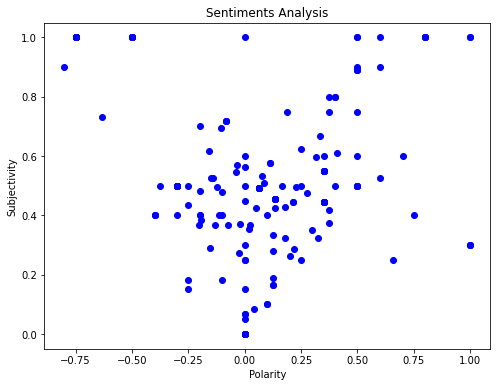

In [26]:
#plot the polarity and subjectivity of the tweets
#you can use len(df) instead of df.shape[0]. They both return the number of rows
plt.figure(figsize = (8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')
    
plt.title('Sentiments Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [32]:
#Another way to get positive tweets
ptweets = df[df.Sentiments == 'Positive']
ptweets = ptweets['tweet']


#Get the percentage of positive tweets
round(len(ptweets)/len(df) *100, 1)

#round(ptweets.shape[0]/df.shape[0]*100, 1)

35.0

In [33]:
#Get the percentage of negative tweets
ntweets = df[df.Sentiments == 'Negative']
ntweets = ntweets['tweet']

round(len(ntweets)/len(df) *100, 1)

23.0

In [34]:
#Get the percentage of neutral tweets
nutweets = df[df.Sentiments == 'Neutral']
nutweets = nutweets['tweet']

round(len(nutweets)/len(df) *100, 1)

42.0

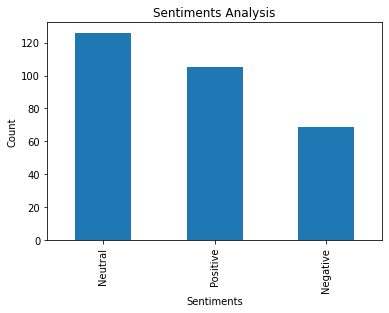

In [35]:
#show the value counts
df['Sentiments'].value_counts()

plt.title('Sentiments Analysis')
plt.xlabel('Sentiments')
plt.ylabel('Count')

df['Sentiments'].value_counts().plot(kind = 'bar')
plt.show()